In [1]:
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv
from pathlib import Path
import requests
import matplotlib
import json



In [2]:
load_dotenv()

Tiingo_api_key = os.getenv('TIINGO')

print(Tiingo_api_key)

fef57480e2e0f8ec3e8773f51f4e26142fcd0ee6


In [3]:
Start_date = "2022-01-01"
End_date =  "2022-03-01"
ticker = "aapl"

requests_url = f"https://api.tiingo.com/tiingo/daily/{ticker}/prices?startDate={Start_date}&endDate={End_date}&token={Tiingo_api_key}&format=json&resampleFreq=daily" 
print(requests_url)


https://api.tiingo.com/tiingo/daily/aapl/prices?startDate=2022-01-01&endDate=2022-03-01&token=fef57480e2e0f8ec3e8773f51f4e26142fcd0ee6&format=json&resampleFreq=daily


In [4]:
headers = {
    'Content-Type': 'application/json'
}
requestResponse = requests.get(requests_url, headers=headers)
print(requestResponse.json())

[{'date': '2022-01-03T00:00:00.000Z', 'close': 182.01, 'high': 182.88, 'low': 177.71, 'open': 177.83, 'volume': 104701220, 'adjClose': 180.4563469496, 'adjHigh': 181.3189205546, 'adjLow': 176.1930521203, 'adjOpen': 176.31202779, 'adjVolume': 104701220, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2022-01-04T00:00:00.000Z', 'close': 179.7, 'high': 182.94, 'low': 179.12, 'open': 182.63, 'volume': 99310438, 'adjClose': 178.1660653088, 'adjHigh': 181.3784083894, 'adjLow': 177.5910162388, 'adjOpen': 181.0710545762, 'adjVolume': 99310438, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2022-01-05T00:00:00.000Z', 'close': 174.92, 'high': 180.17, 'low': 174.64, 'open': 179.61, 'volume': 94537602, 'adjClose': 173.4268678008, 'adjHigh': 178.6320533482, 'adjLow': 173.149257905, 'adjOpen': 178.0768335565, 'adjVolume': 94537602, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2022-01-06T00:00:00.000Z', 'close': 172.0, 'high': 175.3, 'low': 171.64, 'open': 172.7, 'volume': 96903955, 'adjClose': 170.

In [5]:
requestResponse_norm =pd.json_normalize(requestResponse.json())
print(requestResponse_norm)

                        date   close      high       low     open     volume  \
0   2022-01-03T00:00:00.000Z  182.01  182.8800  177.7100  177.830  104701220   
1   2022-01-04T00:00:00.000Z  179.70  182.9400  179.1200  182.630   99310438   
2   2022-01-05T00:00:00.000Z  174.92  180.1700  174.6400  179.610   94537602   
3   2022-01-06T00:00:00.000Z  172.00  175.3000  171.6400  172.700   96903955   
4   2022-01-07T00:00:00.000Z  172.17  174.1400  171.0300  172.890   86709147   
5   2022-01-10T00:00:00.000Z  172.19  172.5000  168.1700  169.080  106765552   
6   2022-01-11T00:00:00.000Z  175.08  175.1800  170.8200  172.320   75937685   
7   2022-01-12T00:00:00.000Z  175.53  177.1800  174.8200  176.120   74805173   
8   2022-01-13T00:00:00.000Z  172.19  176.6200  171.7900  175.780   84505760   
9   2022-01-14T00:00:00.000Z  173.07  173.7800  171.0900  171.340   80440780   
10  2022-01-18T00:00:00.000Z  169.80  172.5400  169.4050  171.510   90500236   
11  2022-01-19T00:00:00.000Z  166.23  17

In [6]:
requestResponse_norm = requestResponse_norm.set_index('date')

In [7]:
requestResponse_norm.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2022-01-03T00:00:00.000Z,182.01,182.88,177.71,177.83,104701220,180.456347,181.318921,176.193052,176.312028,104701220,0.0,1.0
2022-01-04T00:00:00.000Z,179.70,182.94,179.12,182.63,99310438,178.166065,181.378408,177.591016,181.071055,99310438,0.0,1.0
2022-01-05T00:00:00.000Z,174.92,180.17,174.64,179.61,94537602,173.426868,178.632053,173.149258,178.076834,94537602,0.0,1.0
2022-01-06T00:00:00.000Z,172.00,175.30,171.64,172.70,96903955,170.531793,173.803624,170.174866,171.225818,96903955,0.0,1.0
2022-01-07T00:00:00.000Z,172.17,174.14,171.03,172.89,86709147,170.700342,172.653526,169.570073,171.414196,86709147,0.0,1.0


In [8]:
requestResponse_norm.index = pd.to_datetime(requestResponse_norm.index)

<AxesSubplot:xlabel='date'>

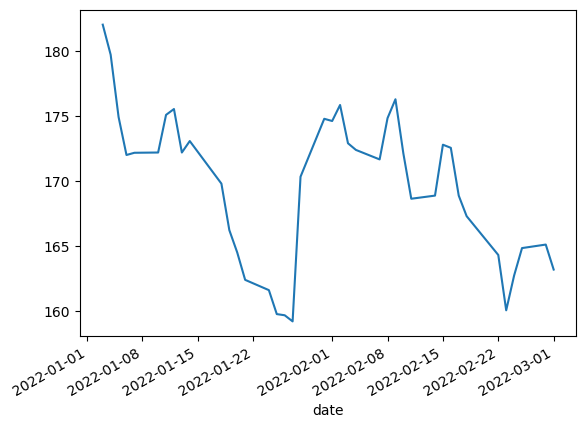

In [9]:
requestResponse_norm['close'].plot()